In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


In [125]:
import pandas as pd
import seaborn as sns
#********************************************
import numpy as np 
import matplotlib.pyplot as plt
#********************************************
import warnings     #for the use of ignoring warnings given by kaggle notebook
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [126]:
#df = dataframe of the exoplanets
df = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv")

In [127]:
df.shape

(5087, 3198)

**###EDA is been done on the dataset of the exoplanet in the below codes**

In [128]:
df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [129]:
#it shows any null values present in the rows
df[df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


In [130]:
df.head(9)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65


<Axes: >

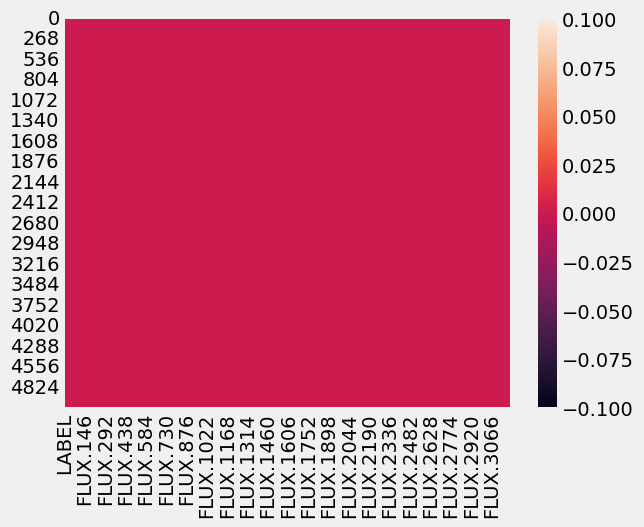

In [131]:
#displays any null values present in the data through heatmap.
sns.heatmap(df.isnull())

**Decoding labels in the dataset...**

In [132]:
#check how many unique labels are present in the dataset
df['LABEL'].unique()

array([2, 1])

**The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.****

In [133]:
#Extracting the labels which confirms the presence of exoplanet
list = df[df['LABEL']==2]
list

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [134]:
list.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36],
      dtype='int64')

In [135]:
'''
#visualizing the labels
plt.figure(figsize =(3,5))
ax= sns.countplot('LABEL',data = df, palette = 'Set2')
ax.bar_label(ax.containers[0])
'''

"\n#visualizing the labels\nplt.figure(figsize =(3,5))\nax= sns.countplot('LABEL',data = df, palette = 'Set2')\nax.bar_label(ax.containers[0])\n"

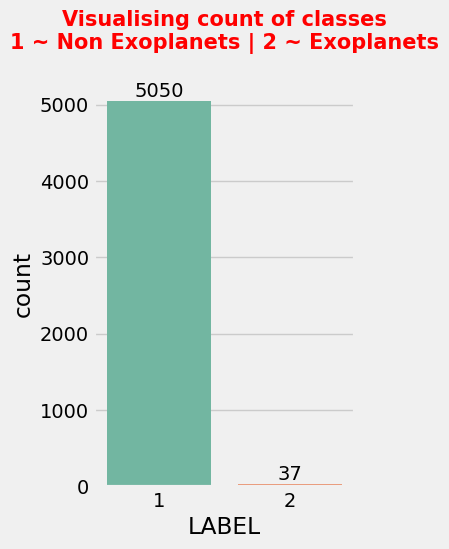

In [136]:
plt.figure(figsize = (3, 5))                                                   
ax = sns.countplot( data = df,x = 'LABEL', palette = 'Set2')                    
ax.bar_label(ax.containers[0])
plt.title("Visualising count of classes\n1 ~ Non Exoplanets | 2 ~ Exoplanets\n", 
          fontsize = 15, color = 'red', weight = 'bold')
plt.show()

**Now as the data is highly imbalanced due to the label 2 very less as compared to the label 1 so we have to balance the data.**

Feature engineering...
Replacing the labels 2 to 1 and 1 to 0



In [137]:
'''
#Replacing the labels
train_df = df.replace({'LABEL':{2:1,1:0}})
train_df['LABEL'].unique()
'''
# Replacing labels 
train_df = df.replace({'LABEL' : {1:0, 2:1}})
print("Replacing labels...")

# Check the labels now
print("Done!\n")
uniq_val = train_df.LABEL.unique()
print(f"There are {len(uniq_val)} classes in the data:-")
print(f"{uniq_val[0]} - Stars with Exoplanets\n{uniq_val[1]} - Stars without Exoplantes")

Replacing labels...
Done!

There are 2 classes in the data:-
1 - Stars with Exoplanets
0 - Stars without Exoplantes


In [138]:


# Drop label column to plot only the flux values
#now we  want to see the flux values are following the light curve like graph or not for that dropping the other unnecessary feature ie.label
plot_df = df.drop(['LABEL'],axis = 1)
plot_df





,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [139]:
'''
# X - axis data: Replace FLUX. from each column names
col_names = list(plot_df.columns)
time = [int(flux_prefix.replace("FLUX.", "")) for flux_prefix in col_names]

# Function to plot flux variation of star
def flux_plot(df, candidate, exo = True):
    color = 'b' if exo == True else 'm'
    plt.figure(figsize=(15, 5))
    plt.plot(time, df.iloc[candidate-1], linewidth = .5, color = color)
    title1, clr1 = f"Flux Variation of star {candidate} with Exoplanents", 'olive'
    title2, clr2 = f"Flux Variation of star {candidate} without Exoplanets", 'tab:red'
    plt.title(title1, color = clr1) if exo == True else plt.title(title2, color = clr2)
    plt.xlabel("Time")
    plt.ylabel("Flux Variation")
    '''

'\n# X - axis data: Replace FLUX. from each column names\ncol_names = list(plot_df.columns)\ntime = [int(flux_prefix.replace("FLUX.", "")) for flux_prefix in col_names]\n\n# Function to plot flux variation of star\ndef flux_plot(df, candidate, exo = True):\n    color = \'b\' if exo == True else \'m\'\n    plt.figure(figsize=(15, 5))\n    plt.plot(time, df.iloc[candidate-1], linewidth = .5, color = color)\n    title1, clr1 = f"Flux Variation of star {candidate} with Exoplanents", \'olive\'\n    title2, clr2 = f"Flux Variation of star {candidate} without Exoplanets", \'tab:red\'\n    plt.title(title1, color = clr1) if exo == True else plt.title(title2, color = clr2)\n    plt.xlabel("Time")\n    plt.ylabel("Flux Variation")\n    '

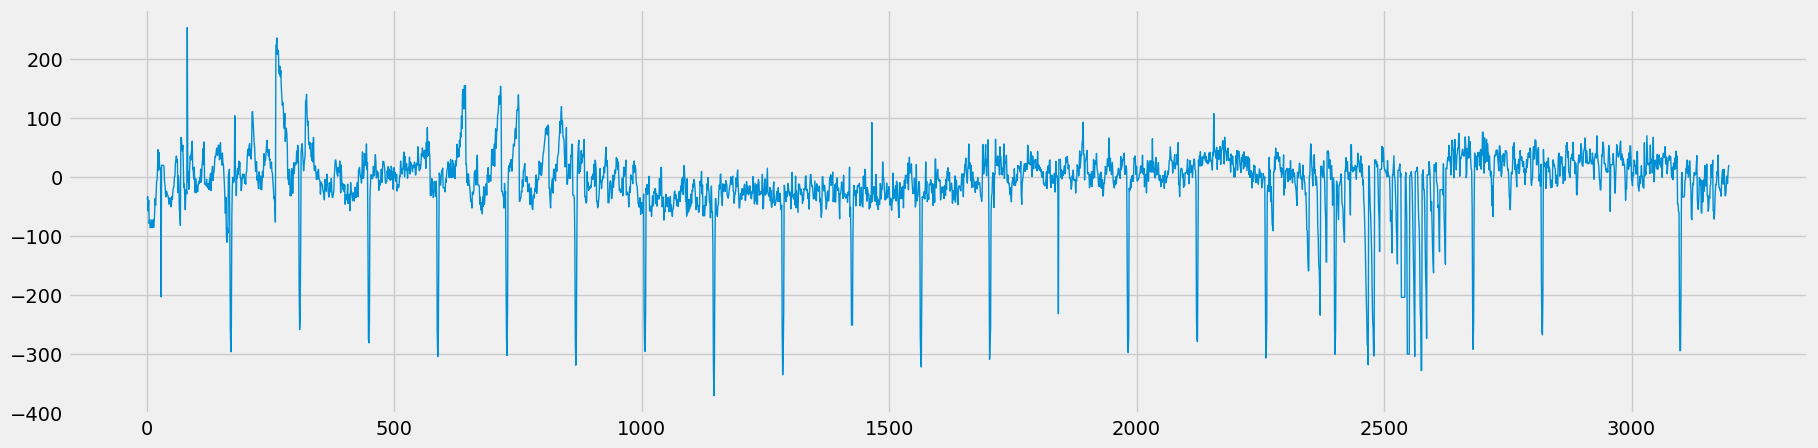

In [140]:
#plotting a random star from the plot_df...Light Curves
time = range(1,3198)
flux_val = plot_df.iloc[1,:].values
plt.figure(figsize=(20,5))
plt.plot(time,flux_val,linewidth = 1)


**#taking out the outliers present in the data...can be seen from above fig**



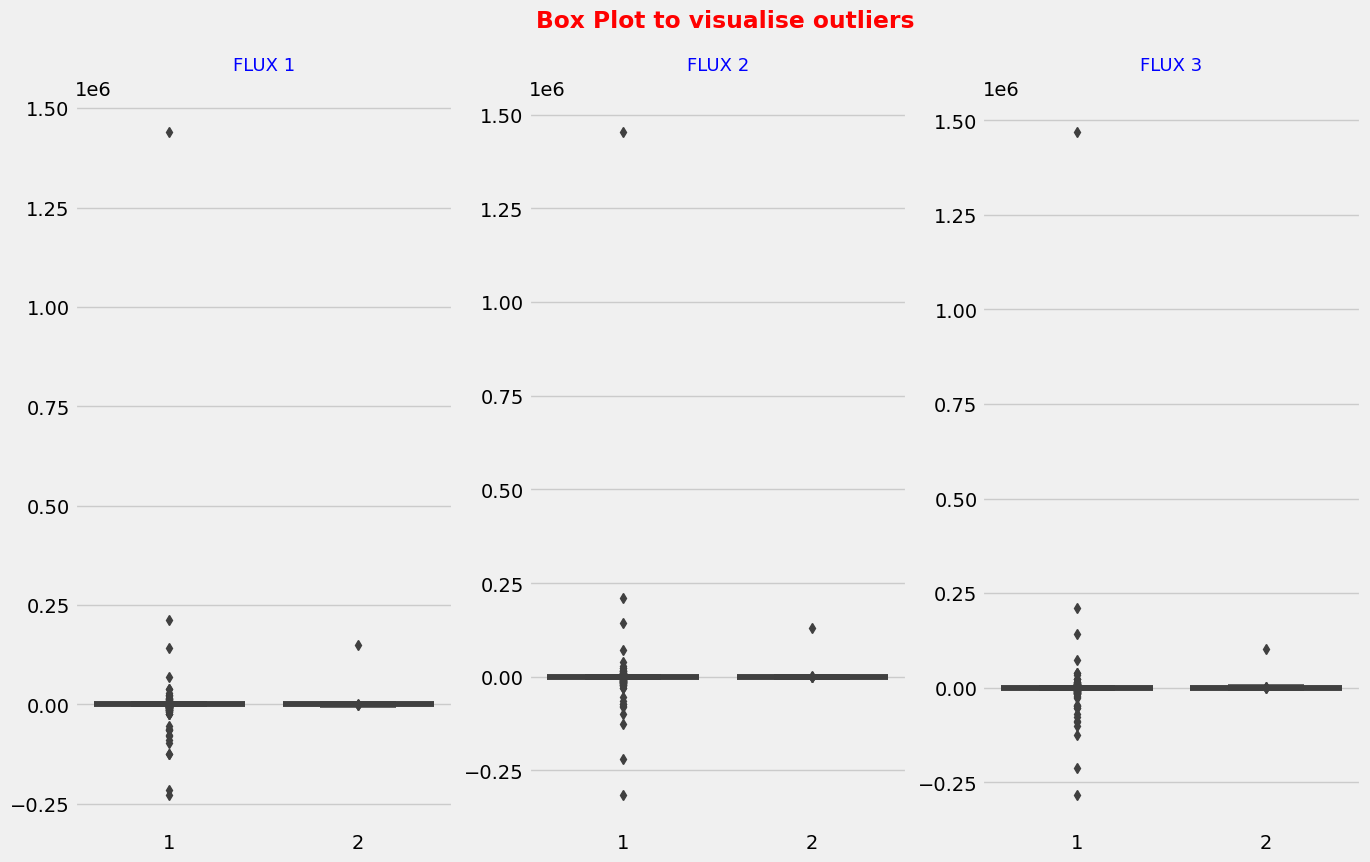

In [141]:
'''
plt.figure(figsize = (20,10))
for i in range(1,4):
    plt.subplot(1,4,i)
    plt.boxplot(data = df,x = 'LABEL',y = 'FLUX.' + str(i))

'''

# Boxplot to visualise outliers
plt.figure(figsize = (20, 9))
plt.suptitle("Box Plot to visualise outliers", ha = 'right', color = 'red', weight = 'bold')
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df, x='LABEL', y = 'FLUX.' + str(i))
    plt.xlabel("")
    plt.ylabel("")
    plt.title("FLUX " + str(i) + "\n", color = 'b', fontsize = 13)

In [142]:
# Get the extreme outliers
extreme_outliers = train_df[train_df['FLUX.2'] > 0.25e6]
extreme_outliers

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
3340,0,1439240.5,1453319.0,1468429.0,1495750.0,1510937.0,1508152.5,1465743.0,1416827.0,1342888.5,...,469144.5,514999.0,563276.0,587067.5,589078.5,583560.0,288607.5,215972.0,193191.0,185221.5


In [143]:
# Drop the extreme outlier
print("Droping Extreme Outliers...")
train_df.drop(extreme_outliers.index, axis = 0, inplace = True)  # axis = 0 ----> row
print("Done!")

Droping Extreme Outliers...
Done!


<Axes: xlabel='LABEL', ylabel='FLUX.491'>

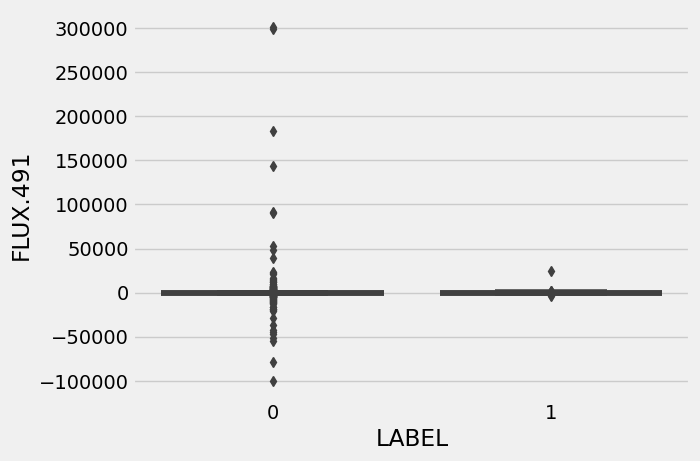

In [144]:
# Cross check via any random box plot
sns.boxplot(data=train_df, x='LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

## Implementing KNN after handling the extreme outliers but have yet not balanced the data
*It would be interesting to compare the results with and without imbalance in our data. Let us first start with imbalanced data:-*

In [145]:
# Extract dependent and independent features
x = train_df.drop(['LABEL'], axis = 1)
y = train_df.LABEL

print(f"Take a look over ~\n\nX train array:-\n{x.values}\n\nY train array:-\n{y.values}")

Take a look over ~

X train array:-
[[ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]
 [-38.88 -33.83 -58.54 ...   6.46  16.    19.93]
 [532.64 535.92 513.73 ... -28.91 -70.02 -96.67]
 ...
 [273.39 278.   261.73 ...  88.42  79.07  79.43]
 [  3.82   2.09  -3.29 ... -14.55  -6.41  -2.55]
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]]

Y train array:-
[1 1 1 ... 0 0 0]


In [146]:
x,y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [147]:
# Splitting this dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [148]:
# Feature scaling
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum: {round(np.min(X_train_sc),2)}\nMean: {round(np.mean(X_train_sc),2)}\nMax: {round(np.max(X_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum: {round(np.min(X_test_sc),2)}\nMean: {round(np.mean(X_test_sc),2)}\nMax: {round(np.max(X_test_sc), 2)}\n")

X_train after scaling ~

Minimum: -57.1
Mean: 0.0
Max: 59.46

--------------------------------

X_test after scaling ~

Minimum: -133.38
Mean: 0.0
Max: 112.18



In [149]:
# Fiting the KNN Classifier Model on to the training data
from sklearn.neighbors import KNeighborsClassifier as KNC

# Choosing K = 10
knn_classifier = KNC(n_neighbors=5,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))


Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



The precision recall, f1 score is not pretty good for the label 1 so good validaion score but the other report values is not good...in this way confusion matrix is helpful

Text(0.5, 1.0, 'CONFUSION MATRIX')

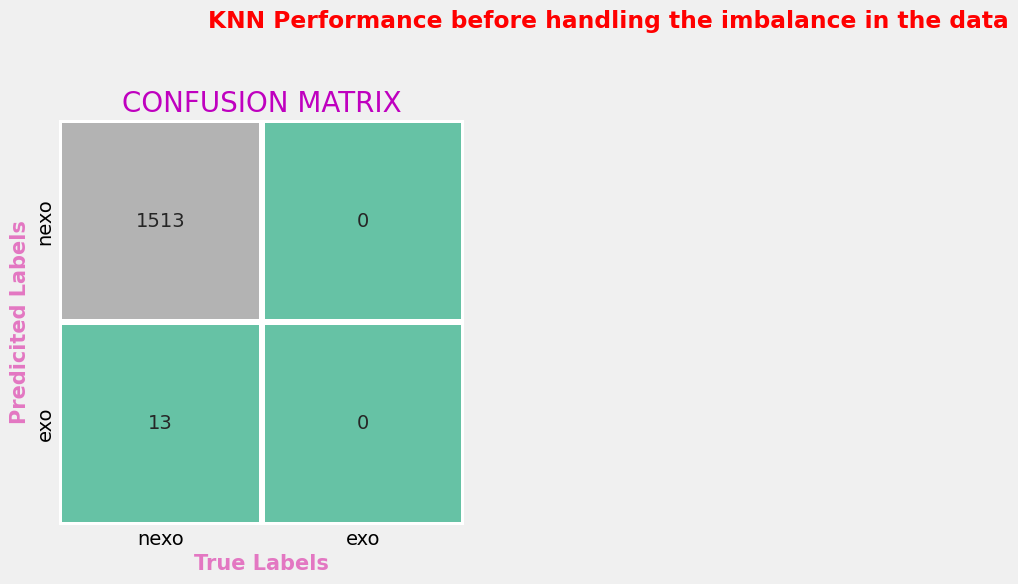

In [150]:
#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'r', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'm')

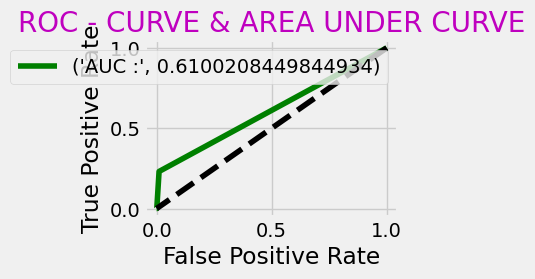

In [151]:

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()


* ### Handling the imbalance in the data and then applying KNN

In [152]:
# Handling imbalanced data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)  # Taking the original x, y as arguments

print(f"Before sampling:- {Counter(y)}")
print(f"After sampling:- {Counter(y_ros)}")

Before sampling:- Counter({0: 5049, 1: 37})
After sampling:- Counter({1: 5049, 0: 5049})


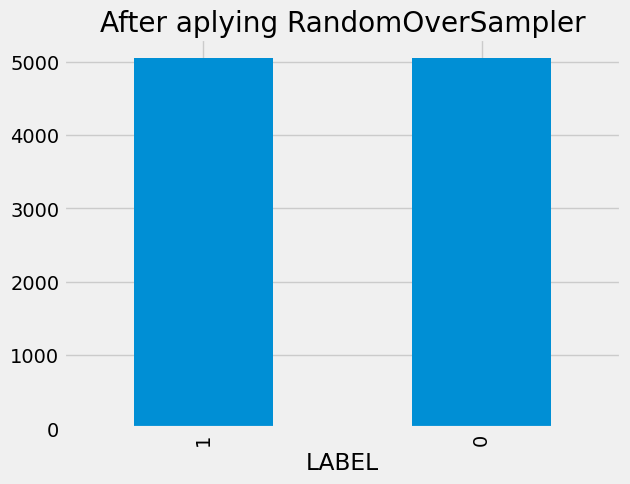

In [153]:
# Visualise it
y_ros.value_counts().plot(kind='bar', title='After aplying RandomOverSampler');

Now the labels 0 and 1 are well balanced.

In [154]:
#performing the same procedure of KNC for the balanced data
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [155]:
# Fiting the KNN Classifier Model on to the training data after

# Choosing K = 1..as it is giving a less false negatives  value 
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))


Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



Text(0.5, 1.0, 'CONFUSION MATRIX')

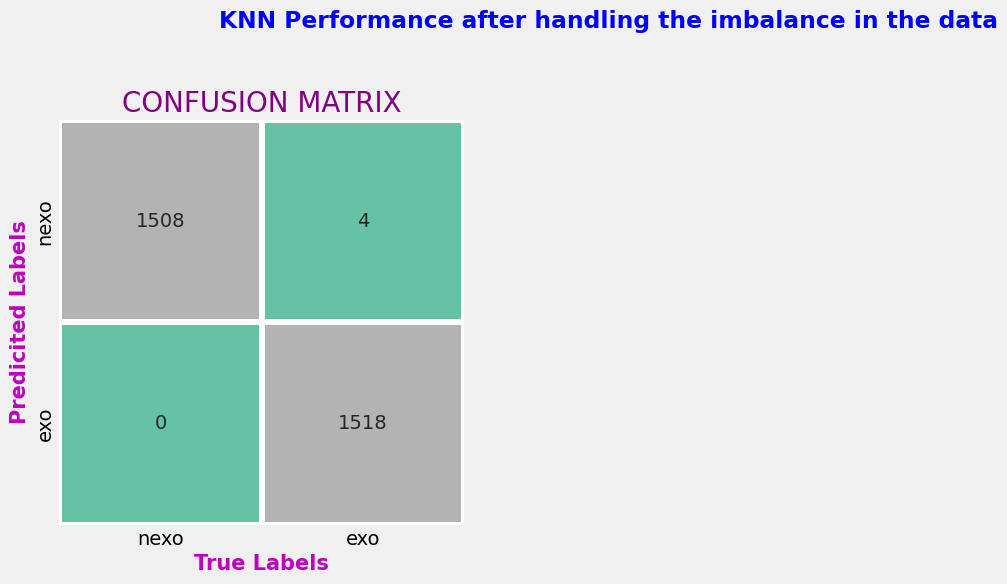

In [156]:
#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance after handling the imbalance in the data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')

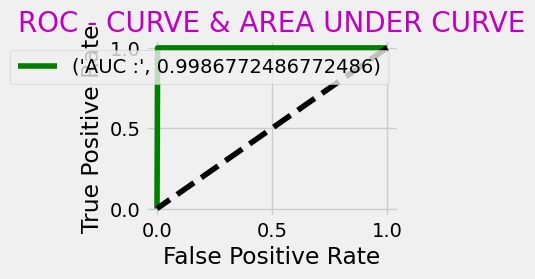

In [157]:
#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

**Now we have donw all this model learning through train set , now using the test set for the same process.**

In [158]:
dfs = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTest.csv")

In [159]:
dfs.shape

(570, 3198)

In [160]:
dfs.head(9)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78


In [161]:
dfs.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [162]:
dfs.LABEL.unique()

array([2, 1])

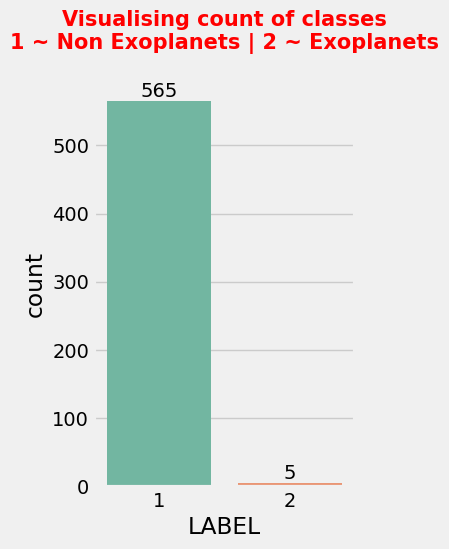

In [163]:
# Visualise these values using countplot
plt.figure(figsize = (3, 5))                                                   
ax = sns.countplot(x = 'LABEL', data = dfs, palette = 'Set2')                    
ax.bar_label(ax.containers[0])
plt.title("Visualising count of classes\n1 ~ Non Exoplanets | 2 ~ Exoplanets\n", 
          fontsize = 15, color = 'red', weight = 'bold')
plt.show()

**Huge imbalance in the dataset..**

In [164]:
# Replacing labels 
train_dfs = dfs.replace({'LABEL' : {1:0, 2:1}})
print("Replacing labels...")

# Check the labels now
print("Done!\n")
uniq_val = train_dfs.LABEL.unique()
print(f"There are {len(uniq_val)} classes in the data:-")
print(f"{uniq_val[0]} - Stars with Exoplanets\n{uniq_val[1]} - Stars without Exoplantes")

Replacing labels...
Done!

There are 2 classes in the data:-
1 - Stars with Exoplanets
0 - Stars without Exoplantes


In [165]:

# Drop label column to plot only the flux values
#now we  want to see the flux values are following the light curve like graph or not for that dropping the other unnecessary feature ie.label
plot_dfs = dfs.drop(['LABEL'],axis = 1)
plot_dfs

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,107.28,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,-10.48,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,-14.78,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,-4.36,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


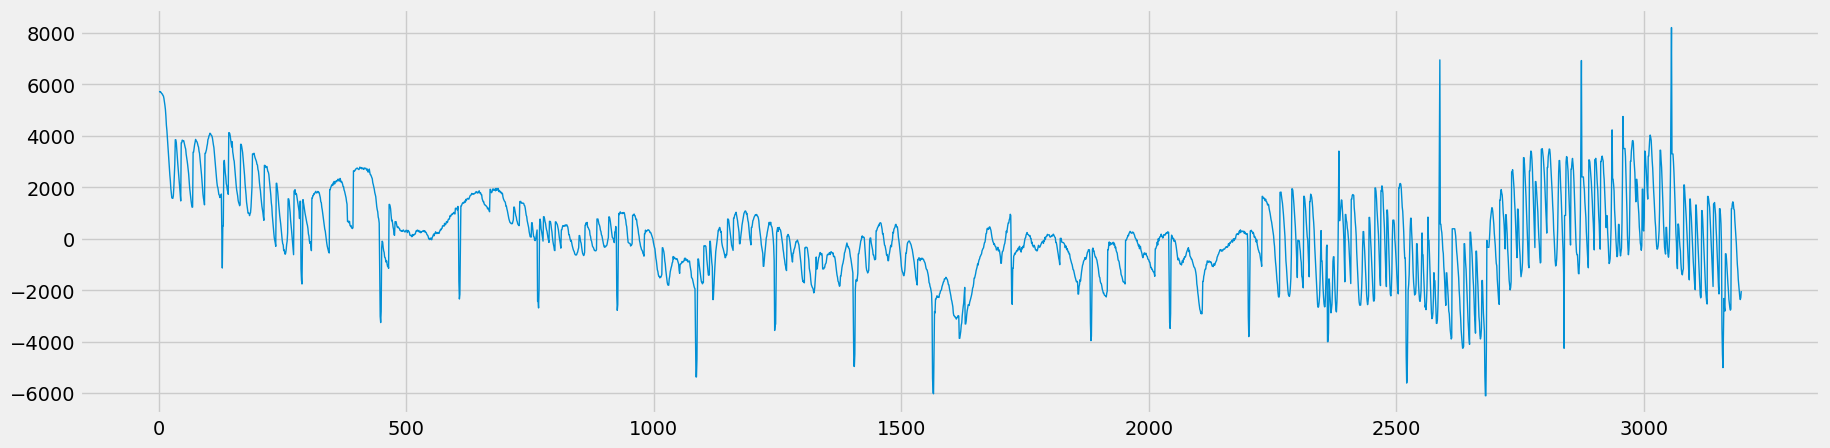

In [166]:
#plotting a random star from the plot_df
time = range(1,3198)
flux_val = plot_dfs.iloc[1,:].values
plt.figure(figsize=(20,5))
plt.plot(time,flux_val,linewidth = 1)

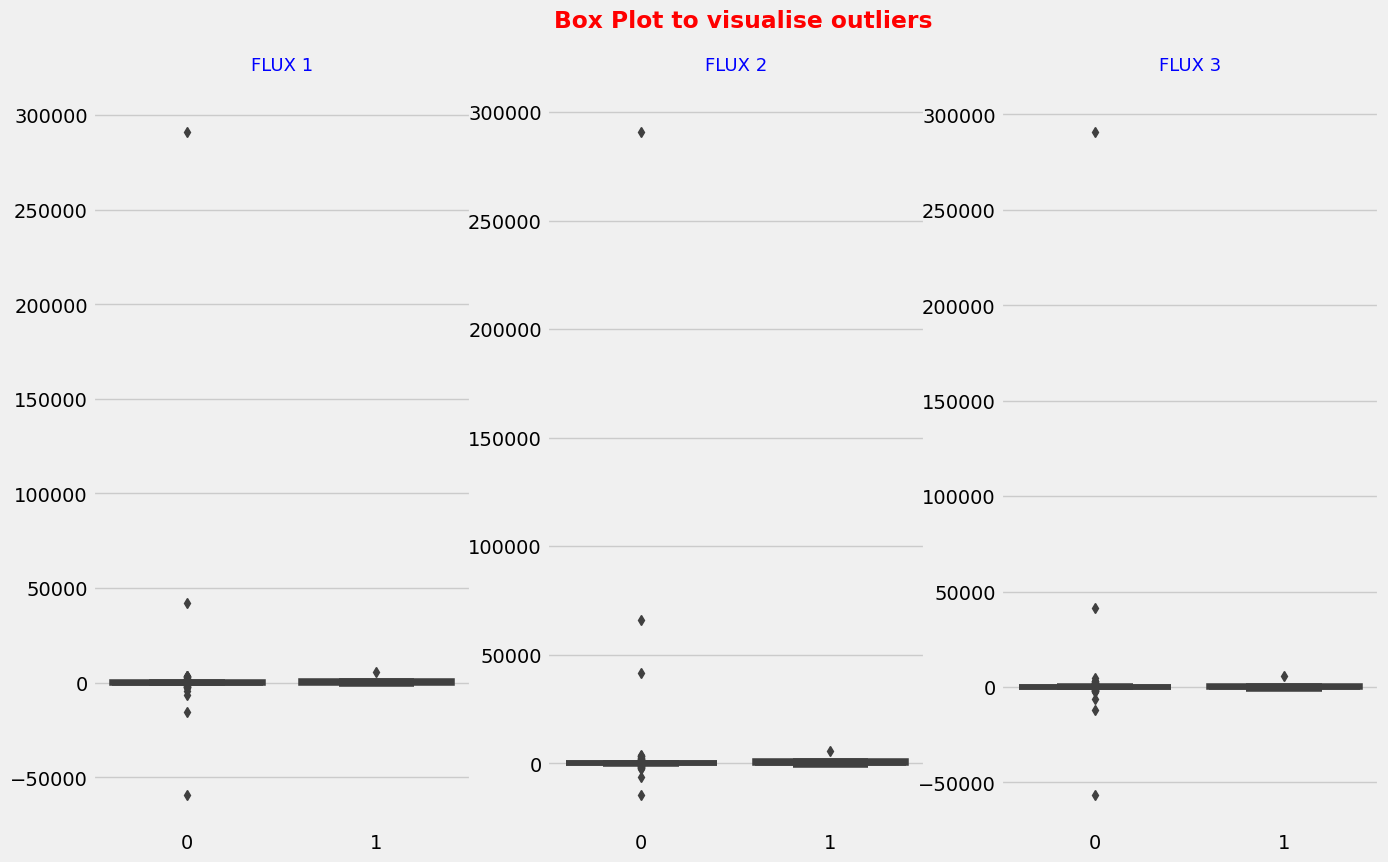

In [167]:
# Boxplot to visualise outliers
plt.figure(figsize = (20, 9))
plt.suptitle("Box Plot to visualise outliers", ha = 'right', color = 'red', weight = 'bold')
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data=train_dfs, x='LABEL', y = 'FLUX.' + str(i))
    plt.xlabel("")
    plt.ylabel("")
    plt.title("FLUX " + str(i) + "\n", color = 'b', fontsize = 13)

In [168]:
# Get the extreme outliers
extreme_outliers = train_dfs[train_dfs['FLUX.2'] > 0.5e5]
extreme_outliers

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
230,0,290882.5,290653.5,290554.0,290486.5,290289.0,289982.5,289197.5,288520.5,287404.5,...,198420.0,197888.5,199639.0,202007.0,203730.5,205924.0,203193.0,205050.0,206884.5,211488.5
445,0,-59421.0,65764.0,-56580.0,64011.0,-54545.0,64728.0,-53580.0,66578.0,-53832.0,...,-64757.0,71440.0,-57455.0,59372.0,-52364.0,47645.0,31243.0,-38673.0,25968.0,-32205.0


In [169]:
# Drop the extreme outlier
print("Droping Extreme Outliers...")
train_dfs.drop(extreme_outliers.index, axis = 0, inplace = True)  # axis = 0 ----> row
print("Done!")

Droping Extreme Outliers...
Done!


<Axes: xlabel='LABEL', ylabel='FLUX.688'>

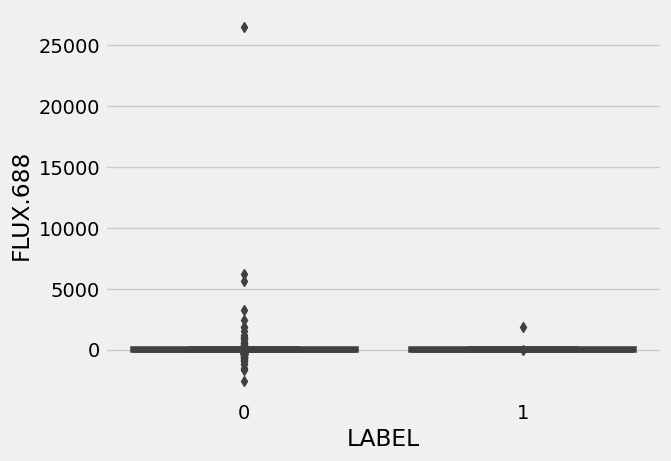

In [171]:
# Cross check via any random box plot
sns.boxplot(data=train_dfs, x='LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

KNN 

In [172]:
# Extract dependent and independent features
x2 = train_dfs.drop(['LABEL'], axis = 1)
y2 = train_dfs.LABEL

print(f"Take a look over ~\n\nX train array:-\n{x2.values}\n\nY train array:-\n{y2.values}")

Take a look over ~

X train array:-
[[ 1.19880e+02  1.00210e+02  8.64600e+01 ...  3.57800e+01  2.69430e+02
   5.77200e+01]
 [ 5.73659e+03  5.69998e+03  5.71716e+03 ... -2.36619e+03 -2.29486e+03
  -2.03472e+03]
 [ 8.44480e+02  8.17490e+02  7.70070e+02 ... -1.62680e+02 -3.67900e+01
   3.06300e+01]
 ...
 [-5.40100e+01 -4.41300e+01 -4.12300e+01 ...  5.47000e+00  1.44600e+01
   1.87000e+01]
 [ 9.13600e+01  8.56000e+01  4.88100e+01 ... -8.43000e+00 -6.48000e+00
   1.76000e+01]
 [ 3.07119e+03  2.78253e+03  2.60869e+03 ... -2.77220e+02 -6.96300e+01
   1.21560e+02]]

Y train array:-
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [173]:
# Handling imbalanced data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros2 = RandomOverSampler()
x2_ros, y2_ros = ros2.fit_resample(x2, y2)  # Taking the original x, y as arguments

print(f"Before sampling:- {Counter(y2)}")
print(f"After sampling:- {Counter(y2_ros)}")

Before sampling:- Counter({0: 563, 1: 5})
After sampling:- Counter({1: 563, 0: 563})


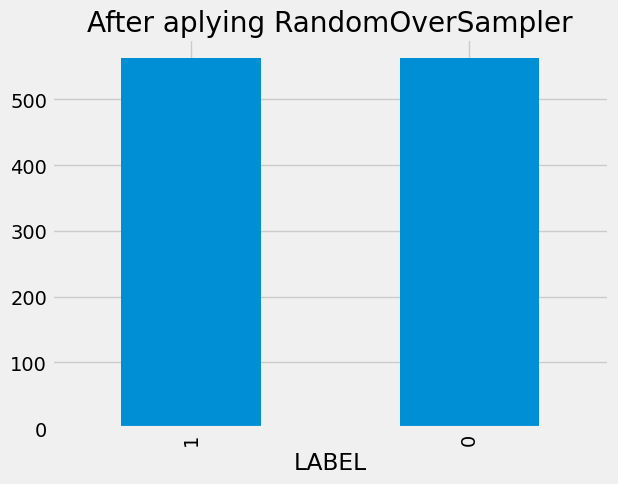

In [174]:
# Visualise it
y2_ros.value_counts().plot(kind='bar', title='After aplying RandomOverSampler');

In [175]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2_ros, y2_ros, test_size = 0.3, random_state = 0)

sc2 = StandardScaler()
X2_train_sc = sc2.fit_transform(X2_train)
X2_test_sc = sc2.transform(X2_test)

In [177]:
# Fiting the KNN Classifier Model on to the training data after

# Choosing K = 1
knn_classifier2 = KNC(n_neighbors=1,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier2.fit(X2_train_sc, y2_train)

# Predict
y2_pred = knn_classifier2.predict(X2_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y2_test,y2_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y2_test,y2_pred)))


Validation accuracy of KNN is 1.0

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       186

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338



Text(0.5, 1.0, 'CONFUSION MATRIX')

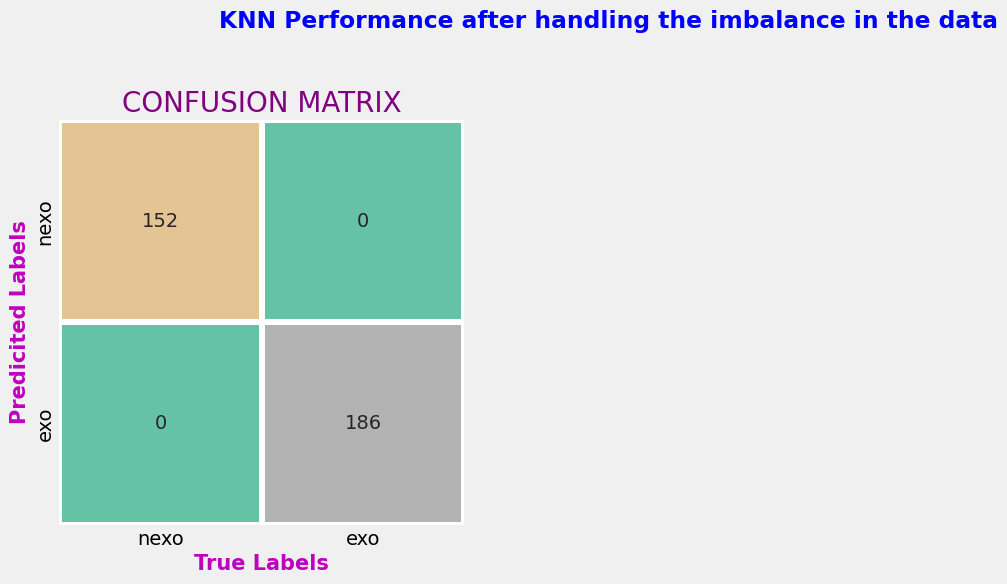

In [178]:
#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance after handling the imbalance in the data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y2_test,y2_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')

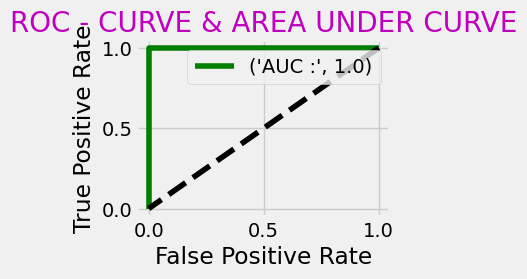

In [179]:
#ROC curve and Area under the curve plotting
predicting_probabilites2 = knn_classifier2.predict_proba(X2_test_sc)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y2_test,predicting_probabilites2)
plt.subplot(222)
plt.plot(fpr2,tpr2,label = ("AUC :",auc(fpr2,tpr2)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()